# GRIP at The Sparks Foundation

# Author: Arkapravo Nandi

# Task 3: Exploratory Data Analysis(EDA) of Sample Superstore

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset

In [2]:
store = pd.read_csv("SampleSuperstore.csv")


# Displaying Some Rows of DataSet

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Shape of The DataSet

In [4]:
store.shape

(9994, 13)

In [5]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploring DataSet

In [6]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Finding the datatype of values of each Column in DataSet

In [7]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Finding if there are any Null values in Each Column of DataSet

In [8]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Checking For Outliers

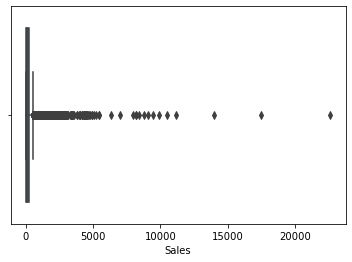

In [9]:
sns.boxplot(x = store['Sales'])

# Observation - There are Outliers Present in the ' Sales ' Column

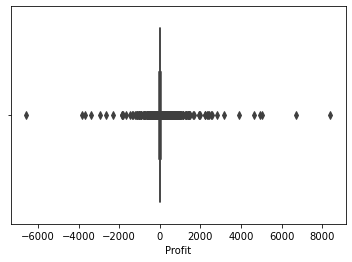

In [10]:
sns.boxplot(x = store['Profit'])

# Observation - There are many Outliers Present in the ' Profit' Column

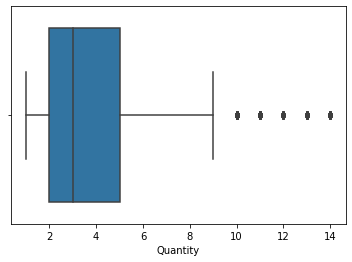

In [11]:
sns.boxplot(x = store['Quantity'])

# Observation - There are Some Outliers Present in the ' Quantity ' Column

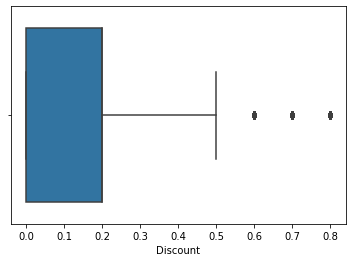

In [12]:
sns.boxplot(x = store['Discount'])

# Observation - There are Some Outliers Present in the ' Discount' Column

# Treatment of Outliers

## Using the IQR Method
## IQR is the acronym for Inter Quartile Range
## It measures the statistical dispersion of data values in a measure of overall distribution

In [100]:
for i in ['Sales']:
    q3, q1 = np.percentile(store.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store.loc[store[i] < min, i] = np.nan
    store.loc[store[i] > max, i] = np.nan


## Replacing the NaN Values with the Mean/Average values in the Column

In [14]:
store['Sales'].fillna(store['Sales'].mean(), inplace = True)

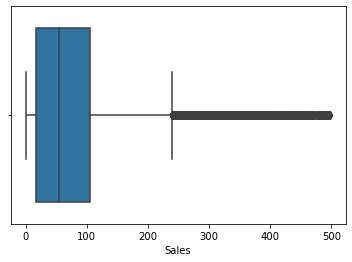

In [15]:
sns.boxplot(x = store['Sales'])

In [16]:
for i in ['Profit']:
    q3, q1 = np.percentile(store.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store.loc[store[i] < min, i] = np.nan
    store.loc[store[i] > max, i] = np.nan

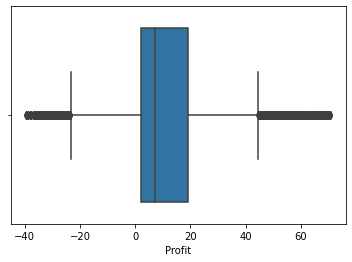

In [17]:
store['Sales'].fillna(store['Profit'].mean(), inplace = True)
sns.boxplot(x = store['Profit'])

In [18]:
for i in ['Discount']:
    q3, q1 = np.percentile(store.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store.loc[store[i] < min, i] = np.nan
    store.loc[store[i] > max, i] = np.nan

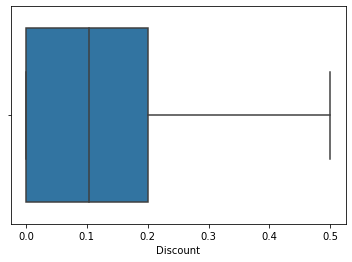

In [19]:
store['Discount'].fillna(store['Discount'].mean(), inplace = True)
sns.boxplot(x = store['Discount'])

In [20]:
for i in ['Quantity']:
    q3, q1 = np.percentile(store.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store.loc[store[i] < min, i] = np.nan
    store.loc[store[i] > max, i] = np.nan

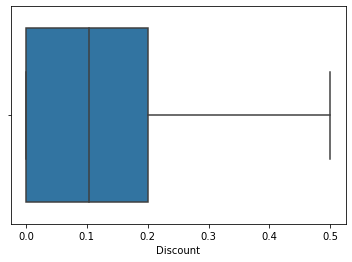

In [21]:
store['Quantity'].fillna(store['Quantity'].mean(), inplace = True)
sns.boxplot(x = store['Discount'])

# It is Observed that All the Outliers are Succesfully Removed

In [22]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,92.864853,3.0,0.00,NaN
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,92.864853,5.0,0.45,NaN
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2.0,0.20,2.5164


# Total Number of Stores in United Sates

In [23]:
total= int(store['Country'].value_counts())
total

9994

# Calculating Our Cost Price

In [24]:
store['Cost'] = store['Sales'] - store['Profit']
store['Cost']

0       220.0464
1            NaN
2         7.7486
3            NaN
4        19.8516
          ...   
9989     21.1452
9990     76.3268
9991    239.1828
9992     16.2800
9993         NaN
Name: Cost, Length: 9994, dtype: float64

# Removing Null Values 

In [30]:
store['Cost'].fillna(store['Cost'].mean(), inplace = True)

In [31]:
store['Profit'].fillna(store['Profit'].mean(), inplace = True)

# Calculating Profit Percentage

In [32]:
store['Profit%'] = (store['Profit']/store['Cost'])*100

In [33]:
store['Profit%'].fillna(store['Profit%'].mean(), inplace = True)

# After Removing Null Values 

In [35]:
store.head(100)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2.0,0.00000,41.913600,220.046400,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,92.864853,3.0,0.00000,11.604086,59.775095,19.412911
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2.0,0.00000,6.871400,7.748600,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,92.864853,5.0,0.45000,11.604086,59.775095,19.412911
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2.0,0.20000,2.516400,19.851600,12.676056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Standard Class,Home Office,United States,Portland,Oregon,97206,West,Office Supplies,Binders,5.682000,1.0,0.10349,-3.788000,9.470000,-40.000000
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.530000,7.0,0.00000,40.542600,55.987400,72.413793
97,First Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Binders,51.312000,3.0,0.20000,17.959200,33.352800,53.846154
98,Standard Class,Corporate,United States,Saint Paul,Minnesota,55106,Central,Office Supplies,Appliances,77.880000,6.0,0.00000,22.585200,55.294800,40.845070


# Correlation Matrix and HeatMap

Text(0.5, 1.0, 'Correlation between the Variables')

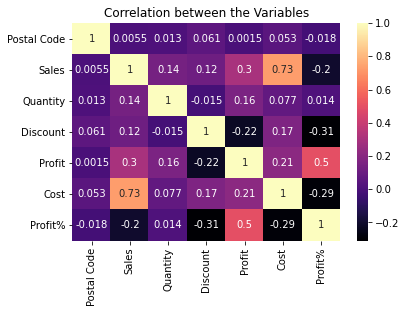

In [36]:
store_correlation = store.corr()
sns.heatmap(store_correlation, annot = True, cmap = 'magma')
plt.title('Correlation between the Variables')

# Conclusions Drawn:


## (1) Sales and Profits are Moderately Correlated

## (2) Quantity and Profit are Moderately Correlated

## (3) Discount and Profit are Negatively Correlated

# What are The Different Types of Shipping Modes Available

In [37]:
shipmode = store.groupby('Ship Mode').groups

for i in shipmode:
    print(i)

First Class
Same Day
Second Class
Standard Class


# Making Histogram Plot To Find Which Shipping Mode is Mostly Preferrred

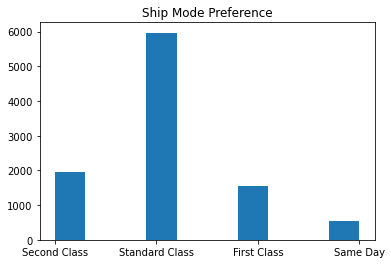

In [38]:
store['Ship Mode'].value_counts()
plt.hist(store['Ship Mode'])
plt.title('Ship Mode Preference')
plt.show()

# Conclusions Drawn

## 1. Standard Class Shipping Mode is Mostly Preffered

## 2. Same Day Shipping Mode is Least Preffered

# Customer Segments

In [39]:
segmenttypes = store.groupby('Segment').groups
for i in segmenttypes:
    print(i)

Consumer
Corporate
Home Office


# Number of people in Each Category of Customer Segements

In [40]:
store['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

# Plotting to Find Which Customer Segments Buys the Products Most

Text(0.5, 1.0, 'Customer Segments')

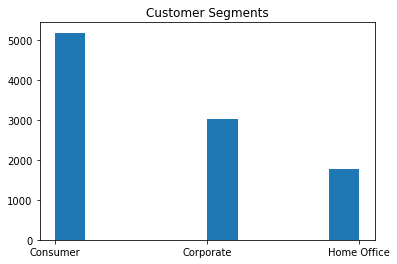

In [41]:
plt.hist(store['Segment'])
plt.title('Customer Segments')

# Conclusions Drawn:


## 1. Consumer Segment Buys the Products Most

## 2. People having Home Office buys the Products Least

# Making Histogram Plot to Find Which Type of Product is Preferred Most

Furniture
Office Supplies
Technology


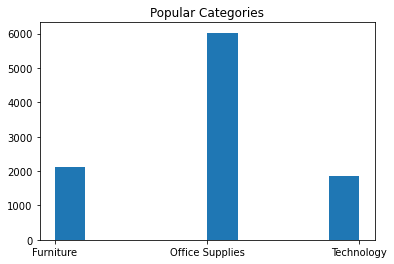

In [42]:
category = store.groupby('Category').groups
for i in category:
    print(i)
plt.hist(store['Category'])
plt.title('Popular Categories')
plt.show()

## Office Supplies are Preferred Most

# Making a Histogram Plot to Find Profit and Sales of Each Product Categories 

<ipython-input-43-bd32ffa7ae11>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x1152 with 0 Axes>

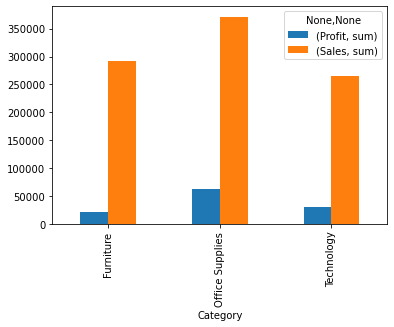

In [43]:
plt.figure(figsize=(10,16))
store.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.show()

## It is Found that Technological Products have Highest Sale Price and Profit compared to 
## other Product Categories

# Region Wise Analysis

Text(0.5, 1.0, 'Region-Wise Products Ordered')

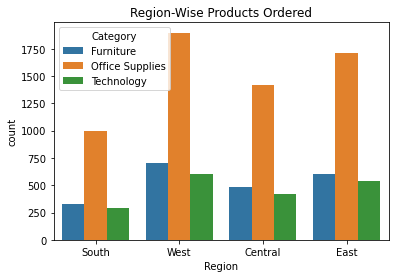

In [44]:
sns.countplot(x=store['Region'], hue= store['Category'])
plt.title('Region-Wise Products Ordered')

# Conclusions:

## 1. The  People in Western Region of USA  Purchases the Products Most

## 2. The  People in Southern Region of USA  Purchases the Products Least

# Subcategory-wise Product Analysis

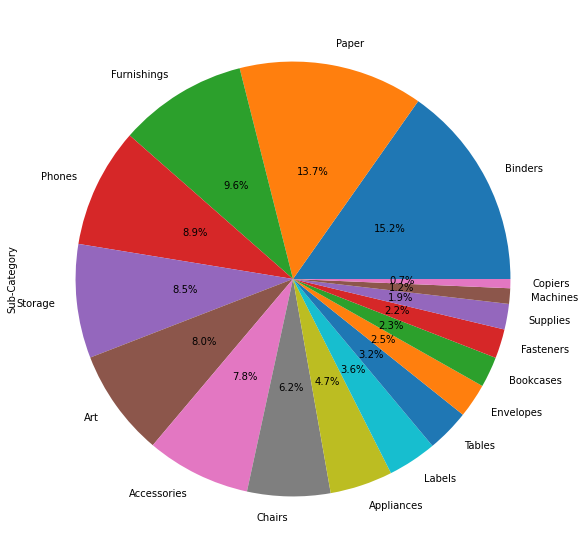

In [45]:
plt.figure(figsize=(10,10))
store['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%', pctdistance = 0.5)

# Conclusions:


## 1. Paper Product is Ordered Most

## 2. Copiers are Ordered Least

# Profit and Sale Price Analysis Of Each of the Subcategorical Products

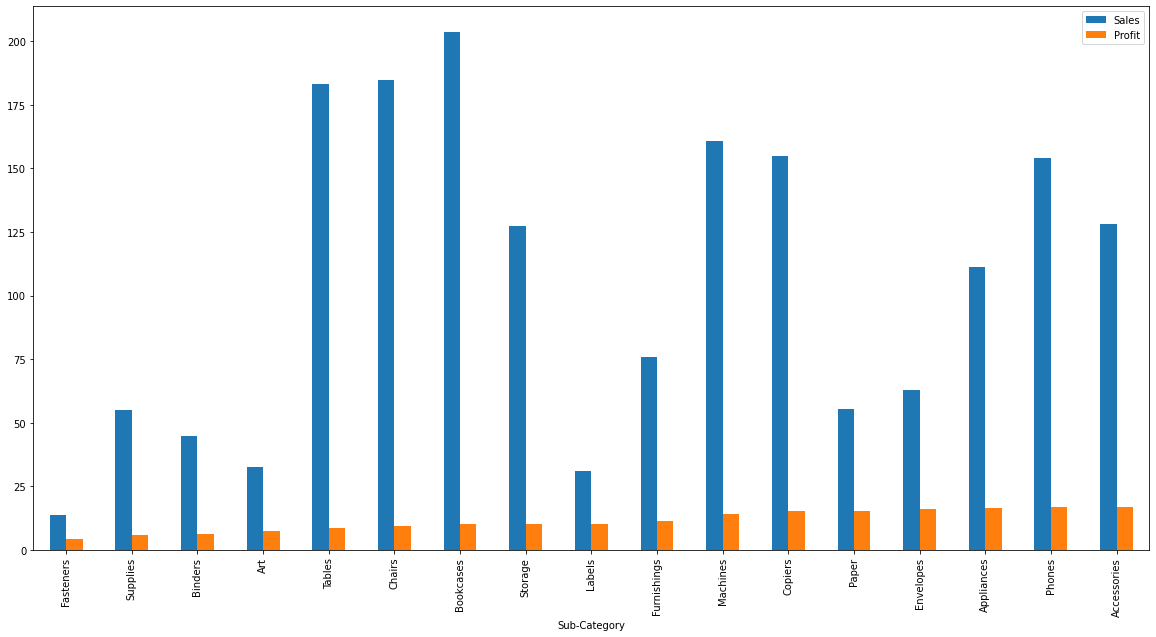

In [46]:
data_subcategory = store.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
data_subcategory.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avg Sales Price($)','Profit($)'])
plt.show()

# Conclusions:

## 1. Sale Price is Highest on BookCases

## 2. Profit  is Highest on Accessories, Phones, Appliances

## 3. Sale Price and Profit is least on Fasteners


# Sate Wise Analysis

In [56]:
states = []
cities = store.groupby('State').groups
for i in cities:
    states.append(i)

# Displaying All the States

In [57]:
states

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

# No. of States in U.S.A

In [58]:
len(states)

49

# Minimum Order of the State

In [77]:
store['State'].value_counts().min()

1

# Maximum Order of the  State

In [79]:
store['State'].value_counts().max()

2001

# Orders of All the States

In [81]:
store['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

# Observation

## 1.  California Makes the Highest Order

## 2. Wyoming Makes the Least Order

# Profit wise State Analysis

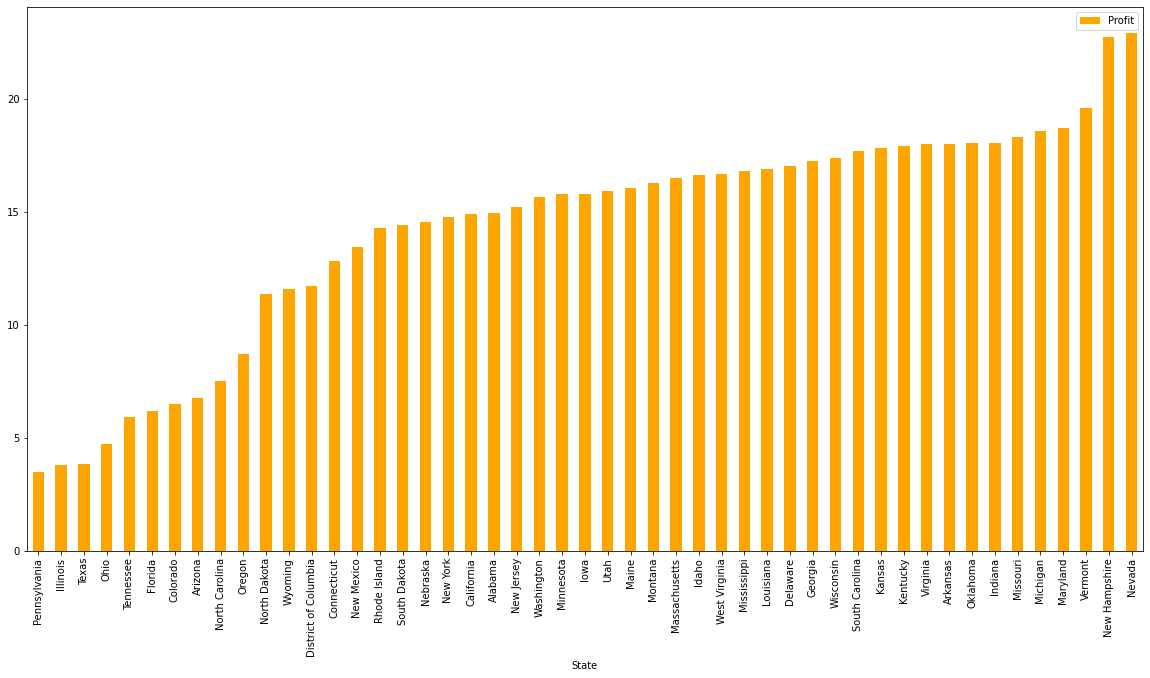

In [82]:
data_states = store.groupby(['State'])[['Profit']].mean()
data_states.sort_values('Profit').plot(kind='bar', color = 'orange',figsize= (20,10),label=['Avg Profit($)'])
plt.show()

# Conclusions:


## 1. Nevada Makes the Highest Profit

## 2. Pennsylvania Makes the Highest Profit

# Sales wise State Analysis

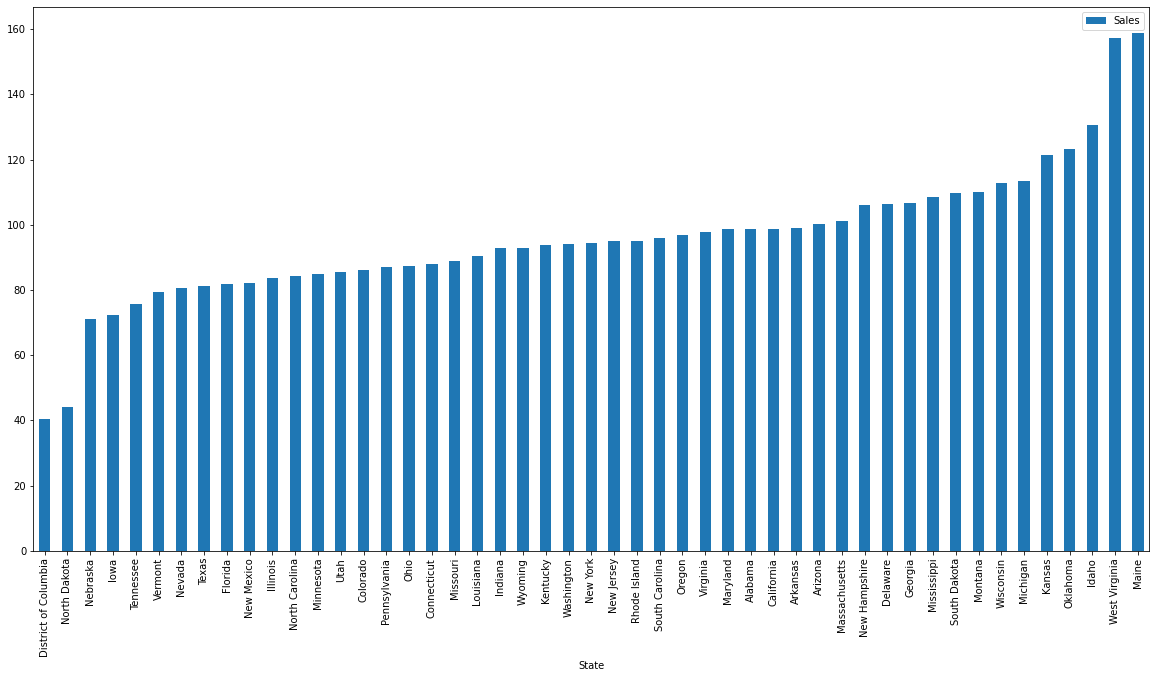

In [84]:
data_states = store.groupby(['State'])[['Sales']].mean()
data_states.sort_values('Sales').plot(kind='bar',figsize= (20,10), label=['Avg Sales Price($)'])
plt.show()

# Conclusions:

## 1. Maine Makes the Highest Sale

## 2. District of Columbia Makes the Lowest Sales

# CityWise Analysis

In [47]:
city = []
cities = store.groupby('City').groups
for i in cities:
    city.append(i)

## Displaying the Names of All Cities

In [48]:
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

## No. of Cities in U.S.A

In [49]:
len(city)

531

# Minimum Order From the  City

In [50]:
store['City'].value_counts().min()

1

# Maximum Order From the City

In [51]:
store['City'].value_counts().max()

915

# Orders of All the Cities

In [52]:
store['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Redding            1
Ormond Beach       1
Saint Peters       1
Layton             1
Santa Maria        1
Name: City, Length: 531, dtype: int64

# Top 10 Cities in Sales and Profit

In [91]:

Top_10_Sales = store.groupby("City").Sales.sum().nlargest(n =10)
Top_10_Profits = store.groupby("City").Profit.sum().nlargest(n =10)

In [92]:
Top_10_Sales.index

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Detroit'],
      dtype='object', name='City')

In [93]:
Top_10_Profits.index

Index(['New York City', 'Los Angeles', 'San Francisco', 'Seattle', 'San Diego',
       'Detroit', 'Columbus', 'Springfield', 'Philadelphia', 'Houston'],
      dtype='object', name='City')

# Top 10 City Wise Sales Analysis

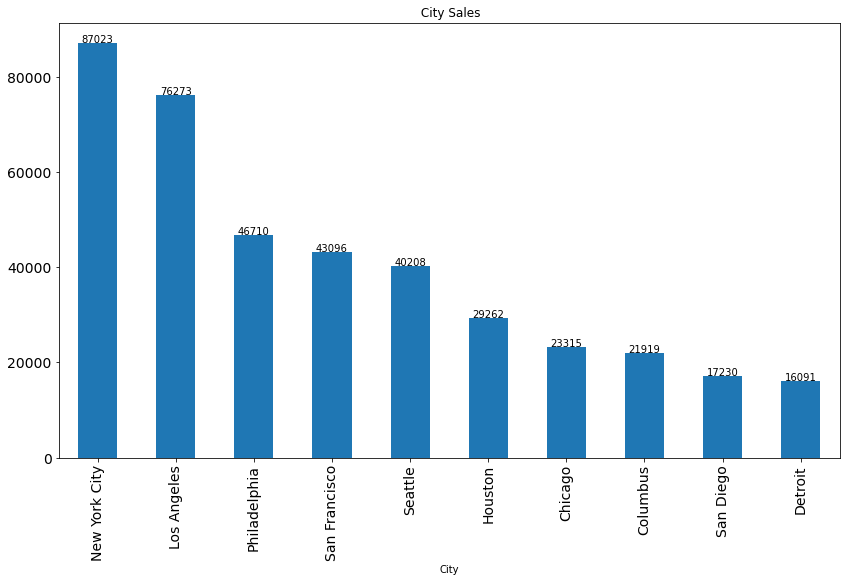

In [96]:
ax =Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
ax.set(title=' City Sales') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
     height = p.get_height()
 # adding text to each bar
     ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
     y = height+100, # y-coordinate position of data label, padded 100 above bar
     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
     ha = 'center')
plt.show()

# Top 10 State Wise Profit Analysis

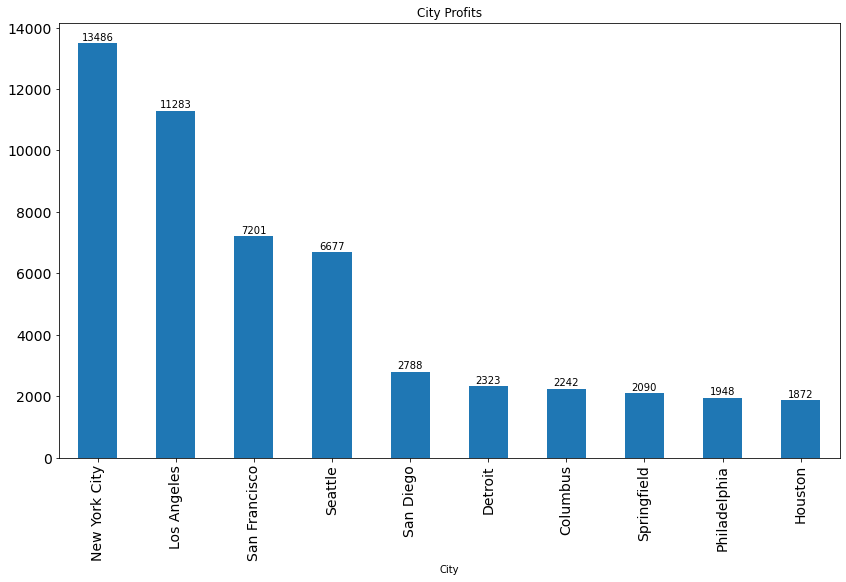

In [98]:
ax =Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
ax.set(title='City Profits') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
     height = p.get_height()
 # adding text to each bar
     ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
     y = height+100, # y-coordinate position of data label, padded 100 above bar
     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
     ha = 'center')
plt.show()

# Conclusion:

# New York City Has Maximum Orders , Highest Sales and Highest Profit

# Displaying the Data of New York City

In [53]:
store[store['City']=='New York City']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
53,Standard Class,Corporate,United States,New York City,New York,10024,East,Office Supplies,Fasteners,15.260000,7.0,0.0,6.256600,9.003400,69.491525
54,Standard Class,Corporate,United States,New York City,New York,10024,East,Technology,Phones,92.864853,5.0,0.0,11.604086,59.775095,19.412911
70,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,4.616000,1.0,0.2,1.731000,2.885000,60.000000
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.530000,7.0,0.0,40.542600,55.987400,72.413793
110,Standard Class,Corporate,United States,New York City,New York,10035,East,Furniture,Furnishings,41.960000,2.0,0.0,10.909600,31.050400,35.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,First Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,199.980000,2.0,0.0,53.994600,145.985400,36.986301
9927,First Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,83.920000,4.0,0.0,20.140800,63.779200,31.578947
9938,Standard Class,Corporate,United States,New York City,New York,10009,East,Furniture,Furnishings,60.350000,5.0,0.0,19.915500,40.434500,49.253731
9939,Standard Class,Corporate,United States,New York City,New York,10009,East,Office Supplies,Supplies,35.520000,4.0,0.0,9.945600,25.574400,38.888889


# Thank You